## Support Vector Machines(SVM) Classifier - Credit Card Fraud Detection

Credit card fraud has been a biggest challenge to the banks in this digital world. Banks are spending quite a lot of amount in detecting whether the transactions are fraudulent.

Our aim is to build a classifier model which can detect whether the transaction is fraudulent or non-fraudulent. 

We have taken the balanced dataset provided by DataHub(https://datahub.io/machine-learning/creditcard) which is normalized and encrypted for maintaining the secrecy of paramters for fraud detection.

### 1. Importing the Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2. Loading the dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/credit_fraud.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### 3. Exploratory Data Analysis

#### 3.1 Checking the shape of the dataset

In [4]:
df.shape

(10000, 31)

From the above result, we can conclude that our dataset has 10k observations and 31 columns.

#### 3.2 Checking the columns in the dataset

In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

So, 'Class' is the target variable in the dataset and all the other features are independent variables.

#### 3.3 Concise summary of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
Time      10000 non-null int64
V1        10000 non-null float64
V2        10000 non-null float64
V3        10000 non-null float64
V4        10000 non-null float64
V5        10000 non-null float64
V6        10000 non-null float64
V7        10000 non-null float64
V8        10000 non-null float64
V9        10000 non-null float64
V10       10000 non-null float64
V11       10000 non-null float64
V12       10000 non-null float64
V13       10000 non-null float64
V14       10000 non-null float64
V15       10000 non-null float64
V16       10000 non-null float64
V17       10000 non-null float64
V18       10000 non-null float64
V19       10000 non-null float64
V20       10000 non-null float64
V21       10000 non-null float64
V22       10000 non-null float64
V23       10000 non-null float64
V24       10000 non-null float64
V25       10000 non-null float64
V26       10000 non-null float64
V27

From the results, we can conclude that our dataset have only numerical columns and does not have any object values.

#### 3.4 Checking for null values in the dataset

In [13]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

From the above results, we can conclude that our dataset does not have any null values.

#### 3.5 Statistical summary of the dataset

In [14]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,...,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,...,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,...,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,...,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,...,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


#### 3.6 Visualizing the data

Drawing the scatter plot on Time and Amount columns for the fraudulent transactions and analyze the impacts.

Text(0.5, 1.0, 'Fraudulent amounts with respect to time')

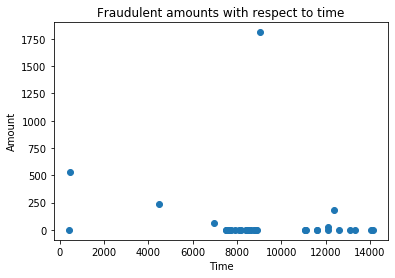

In [22]:
df_fraud = df[df.Class == 1]
plt.scatter(df_fraud.Time, df_fraud.Amount)
plt.xlabel("Time")
plt.ylabel("Amount")
plt.title("Fraudulent amounts with respect to time")

__Observation:__

- Time does not impact the frequency of frauds.
- Most of the fraudulent transactions are less amounts.

#### 3.7 Checking the number of fradulent transcations in the dataset

In [24]:
df.Class.value_counts()

0    9962
1      38
Name: Class, dtype: int64

We have only 38 fraudulent transactions out of 10k observations in the dataset, which means our dataset is imbalanced.

#### 3.8 Frequency of distribution of the Amount in fraudulent transactions

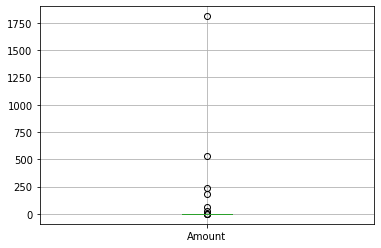

In [30]:
df_fraud.Amount.plot.box(grid = True)

Frequency of distribution of fraudulent amount is imbalanced as there is only 1 out of 38 fruadulent transactions have amount greated than 1750 and rest are less than 750 only. So, we can consider that one transaction amount as outlier.

#### 3.9 Visualizing the correlation between the features

Text(0.5, 1, 'Heatmap Correlation')

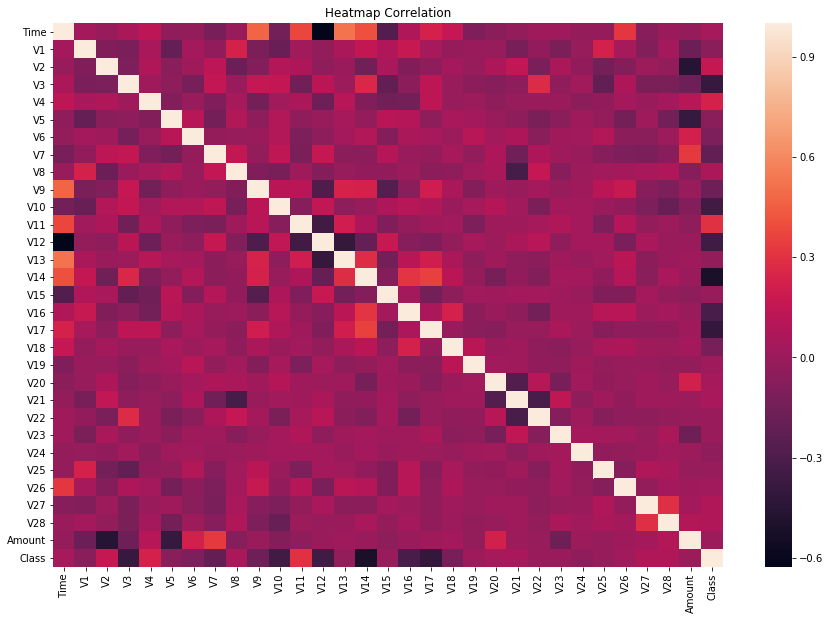

In [39]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr())
plt.title("Heatmap Correlation")

__Observation:__

- From above results, we can conclude that features are not correlated to each other.
- This is because, the dataset we considered already have performed PCA technique.
- This shows that we cannot perform dimensionality reduction again for this dataset.
- Vales are also normalized to a certain scale.

#### 3.10 Finding the features that have correlation with the target variable 'Class'

In [48]:
df_corr = df.corr()
df_rank = df_corr['Class'].sort_values(ascending = False)
df_rank

Class     1.000000
V11       0.297231
V4        0.229448
V2        0.166618
V28       0.081831
V27       0.078159
V8        0.059615
V21       0.053662
V20       0.046082
Time      0.042762
V26       0.022224
V19       0.015076
Amount    0.004252
V23       0.001114
V22      -0.001170
V15      -0.008601
V25      -0.009965
V13      -0.023003
V24      -0.040781
V5       -0.062717
V1       -0.063109
V6       -0.106040
V18      -0.129729
V9       -0.164610
V7       -0.212425
V16      -0.310866
V10      -0.344365
V12      -0.351070
V3       -0.390122
V17      -0.407361
V14      -0.517690
Name: Class, dtype: float64

#### 3.11 Data Selection for Sampling

As our dataset is imbalanced on Classes of Fraud, we have to take the equal samples on Fraud and Non-Fraudulent transactions to train our model to make it to detect Frauds accurately.

- Divide the data into two classes, Fraudulent and Non-Fraudulent.
- Take more or less equal amount of samples from Non-Fraudulent transactions.
- Merge Both samples.
- Mix the dataset.

In [64]:
df_Fraud = df[df.Class == 1]
df_Non_Fraud = df[df.Class == 0]

print("Fraudulent Transactions : ", df_Fraud.shape[0])
print("Non-Fraudulent Transactions : ", df_Non_Fraud.shape[0])

Fraudulent Transactions :  38
Non-Fraudulent Transactions :  9962


In [65]:
df_sample_Non_Fraud = df_Non_Fraud.sample(50) #We are taking only 50 Non-Fradulent transactions from the data.
print("Sample number of Non-Fraudulent Transactions : ", df_sample_Non_Fraud.shape[0])

Sample number of Non-Fraudulent Transactions :  50


In [66]:
df_sample = df_Fraud.append(df_sample_Non_Fraud)
print("Sample number of Fradulent and Non-Fraudulent Transactions after Merge : ", df_sample.shape[0])

Sample number of Fradulent and Non-Fraudulent Transactions after Merge :  88


In [67]:
df_sample = df_sample.sample(frac = 1) #This line mix the transactions inside our new sample dataframe.
df_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9509,14152,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00,1
9470,14025,-1.854433,0.854424,2.655404,1.256375,-0.707800,-0.279509,0.431302,-0.257062,1.926273,...,-0.197866,0.602518,-0.332229,0.919607,0.496518,-0.189141,0.548609,0.294897,119.58,0
6609,8090,-1.783229,3.402794,-3.822742,2.625368,-1.976415,-2.731689,-3.430559,1.413204,-0.776941,...,0.454032,-0.577526,0.045967,0.461700,0.044146,0.305704,0.530981,0.243746,1.00,1
6334,7535,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
8972,12393,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,2.820829,...,1.688665,-0.078845,0.193731,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,179.66,1


### 4. Model Development

- Seperating the train and the test set from the sample data frame.
- Building the SVM classifier.
- Training the SVM model.
- Predicting the results.

Before seperating our dataset into training set and test set, we need to divide the target variable and predictor variables.

#### 4.1 Dropping the 'Time' column as it does not impact frauds (As per section 3.6)

In [69]:
df_sample.drop(columns = 'Time', axis = 1, inplace = True)
df_sample.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
9509,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,-11.712187,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00,1
9470,-1.854433,0.854424,2.655404,1.256375,-0.707800,-0.279509,0.431302,-0.257062,1.926273,0.416360,...,-0.197866,0.602518,-0.332229,0.919607,0.496518,-0.189141,0.548609,0.294897,119.58,0
6609,-1.783229,3.402794,-3.822742,2.625368,-1.976415,-2.731689,-3.430559,1.413204,-0.776941,-6.199882,...,0.454032,-0.577526,0.045967,0.461700,0.044146,0.305704,0.530981,0.243746,1.00,1
6334,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
8972,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,2.820829,1.015113,...,1.688665,-0.078845,0.193731,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,179.66,1


#### 4.2 Seperating the Predictor variable

In [70]:
X = df_sample.loc[:, df_sample.columns != 'Class']
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9509,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,-11.712187,...,1.434240,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00
9470,-1.854433,0.854424,2.655404,1.256375,-0.707800,-0.279509,0.431302,-0.257062,1.926273,0.416360,...,0.468769,-0.197866,0.602518,-0.332229,0.919607,0.496518,-0.189141,0.548609,0.294897,119.58
6609,-1.783229,3.402794,-3.822742,2.625368,-1.976415,-2.731689,-3.430559,1.413204,-0.776941,-6.199882,...,0.364089,0.454032,-0.577526,0.045967,0.461700,0.044146,0.305704,0.530981,0.243746,1.00
6334,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,...,0.587743,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00
8972,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-3.277535,2.820829,1.015113,...,-0.531898,1.688665,-0.078845,0.193731,0.479496,-0.506603,-0.409863,-3.036271,-0.630605,179.66


#### 4.3 Seperating the Target variable

In [71]:
Y = df_sample.loc[:, df_sample.columns == 'Class']
Y.head()

,Class
9509,1
9470,0
6609,1
6334,1
8972,1


#### 4.4 Seperating the train and test data

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 1)

print("Training set")
print(X_train.shape)
print(Y_train.shape)

print("Test set")
print(X_test.shape)
print(Y_test.shape)

Training set
(66, 29)
(66, 1)
Test set
(22, 29)
(22, 1)


#### 4.5 Building the SVM Model (Round 1)

In [110]:
from sklearn import svm
classifier = svm.SVC(kernel = "linear")
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)

### 5. Model Evaluation

Let's evaluate the accuracy of the model by finding the accuracy score and confusion matrix.

#### 5.1 Checking the accuracy of the Model (Round 1)

In [111]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy score : ", accuracy_score(Y_pred, Y_test))

print("Confusion Matrix :")
print(confusion_matrix(Y_pred, Y_test))

Accuracy score :  0.9090909090909091
Confusion Matrix :
[[10  1]
 [ 1 10]]


From the above results, we can able to see that our model has predicted the fraudulent transactions with __90.9%__ accuracy.

Now lets try if we can improve the model accuracy even more by increasing the class weight.

### 6. Model Improvement

#### 6.1 Building the model by modfiying the class weight (Round 2)

We are modifying the class weight because, our target is to build the model which can predict all fraudulent transactions accurately. We don't mind in predicting non-fraudulent transactions as fraudulent but our objective is not to miss out predicting fraudulent transcations as non-fraudulent.

So, we are increasing the weight on non-fradulent transactions more, not to miss out predicting any fraudulent transactions.

In [112]:
from sklearn import svm
classifier = svm.SVC(kernel = "linear", class_weight = {0 : 0.40, 1 : 0.60})
classifier.fit(X_train, Y_train)
Y_pred1 = classifier.predict(X_test)

#### 6.2 Model evaluation after modifying the class weight (Round 2)

In [114]:
print("Accuracy score : ", accuracy_score(Y_pred1, Y_test))

print("Confusion Matrix:")
print(confusion_matrix(Y_pred1, Y_test))

Accuracy score :  0.9090909090909091
Confusion Matrix:
[[10  1]
 [ 1 10]]
